# Packages

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Bruitage des données

In [4]:
def masking_noise(X, v):    
    X_noise = X.copy()

    n_samples = X.shape[0]
    n_features = X.shape[1]

    for i in range(n_samples):
        mask = np.random.choice(range(n_features), int(v*n_features), replace=False)
        for m in mask:
            X_noise[i][m] = 0.
    return X_noise

# Hyper-paramètres

In [7]:
# Parameters
learning_rate = 0.01
training_epochs = 5
batch_size = 256

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

In [8]:
X = tf.placeholder(tf.float32, shape=(None, n_input))
X_noise = tf.placeholder(tf.float32, shape=(None, n_input))

# Denoising Auto Encoder

In [10]:
weights = {
    'encoder_w1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev=0.1)),
    'encoder_w2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev=0.1)),
    'decoder_w1': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_1], stddev=0.1)),
    'decoder_w2': tf.Variable(tf.truncated_normal([n_hidden_1, n_input], stddev=0.1))
}

bias = {
    "encoder_b1": tf.Variable(tf.truncated_normal([1, n_hidden_1], stddev=0.1)),
    "encoder_b2": tf.Variable(tf.truncated_normal([1, n_hidden_2], stddev=0.1)),
    "decoder_b1": tf.Variable(tf.truncated_normal([1, n_hidden_1], stddev=0.1)),
    "decoder_b2": tf.Variable(tf.truncated_normal([1, n_input], stddev=0.1))
}

def encoder(X):
    layer1 = tf.nn.sigmoid(tf.matmul(X, weights['encoder_w1']) + bias['encoder_b1'])
    layer2 = tf.nn.sigmoid(tf.matmul(layer1, weights['encoder_w2']) + bias['encoder_b2'])
    return layer2
    
def decoder(x):
    layer1 = tf.nn.sigmoid(tf.matmul(x, weights['decoder_w1']) + bias['decoder_b1'])
    layer2 = tf.nn.sigmoid(tf.matmul(layer1, weights['decoder_w2']) + bias['decoder_b2'])
    return layer2

In [11]:
encoder_op = encoder(X_noise)
decoder_op = decoder(encoder_op)
pred = decoder_op

# Calcul entropy et loss fonction

In [12]:
entropy = tf.losses.log_loss(labels=X, predictions=decoder_op)
loss = tf.reduce_mean(entropy)

W0112 02:23:23.646866 23944 deprecation.py:323] From C:\Users\odeli\Anaconda3\lib\site-packages\tensorflow\python\ops\losses\losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Adam optimizer

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

# Application: les données mnist

In [15]:
from tensorflow.examples.tutorials.mnist import input_data
MNIST = input_data.read_data_sets("", one_hot = True)

Extracting train-images-idx3-ubyte.gz
Extracting train-labels-idx1-ubyte.gz
Extracting t10k-images-idx3-ubyte.gz
Extracting t10k-labels-idx1-ubyte.gz


Session dynamique de travail

In [16]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [17]:
num_batches = int(MNIST.train.num_examples/batch_size)

for epoch in range(training_epochs):
    total_loss = 0
    for batch in range(num_batches):
        x, _ = MNIST.train.next_batch(batch_size)
        x_noise = masking_noise(x, 0.1)
        _, l = sess.run([optimizer, loss], feed_dict={X_noise: x_noise, X: x})
        total_loss += l
    print("Epoch {0}: {1}".format(epoch, total_loss))

Epoch 0: 47.070442378520966
Epoch 1: 30.551906049251556
Epoch 2: 25.180832765996456
Epoch 3: 22.556916907429695
Epoch 4: 21.131294779479504


In [23]:
x = MNIST.test.images[:10]
x_noise = masking_noise(x, 0.5)
pred_img = sess.run(pred, feed_dict = {X: x, X_noise:x_noise})

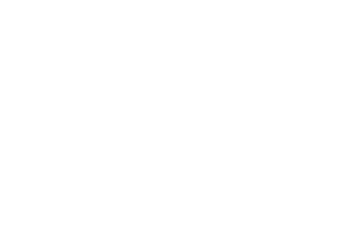

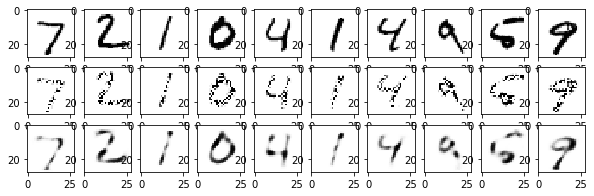

In [24]:
plt.axis('off')
f, a = plt.subplots(3, 10, figsize=(10, 3))
for i in range(10):
    a[0][i].imshow(np.reshape(x[i], (28, 28)), cmap='Greys',  interpolation='nearest')
    a[1][i].imshow(np.reshape(x_noise[i], (28, 28)), cmap='Greys',  interpolation='nearest')
    a[2][i].imshow(np.reshape(pred_img[i], (28, 28)), cmap='Greys',  interpolation='nearest')
plt.show()